In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import *
from sklearn.metrics import log_loss, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.inspection import permutation_importance
from sklearn import set_config
from sklearn.preprocessing import LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.metrics import log_loss
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss, make_scorer
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import log_loss, make_scorer
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [53]:
def load_data(path):
    train = pd.read_csv(path+'Train.csv')
    test = pd.read_csv(path +'Test.csv')
    sub = pd.read_csv( path +'SampleSubmission.csv')
    id = test['id']
    return train, test, sub, id

train, test, sub, id = load_data(path="../data/")

In [54]:
X_train = train.copy()
X_test  = test.copy()
X_test  = test.drop('id', axis=1)
X_train = X_train.drop('Target', axis=1)
X_train = X_train.drop('id', axis=1)
y_train = train['Target']

In [55]:

isolation_forest = IsolationForest(contamination=0.1)  # Adjust contamination rate
is_inlier = isolation_forest.fit_predict(train.drop('Target'))  # Returns 1 for inliers, -1 for outliers

# Keep only inliers
X_train_cleaned = train.drop('Target')[is_inlier == 1]
y_train_cleaned = train['Target'][is_inlier == 1]
# Define the imputer for numerical data
num = Pipeline([
    ('imp', SimpleImputer(strategy='median')),
    ('pca', PCA(n_components=0.95))
 ])
cat = Pipeline([
    ('imp', SimpleImputer(strategy='most_frequent'))
])
# Apply the preprocessing pipeline to the data
train = num.fit_transform(X_train_cleaned)
train = cat.fit_transform(X_train_prepared)
test = num.transform(X_test)
test = cat.transform(X_test_prepared)

# Assuming you have your features in X and target variable in y
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_prepared , y_train_cleaned, test_size=0.2, random_state=42 )

In [56]:
X_train_prepared.shape

(1910, 3)

In [57]:
stpo

NameError: name 'stpo' is not defined

In [ ]:
"""
predictions2 = bagged_knn.predict(X_test_prepared)
"""

'\npredictions2 = bagged_knn.predict(X_test_prepared)\n'

In [ ]:
"""pred =bagged_knn.predict_proba(X_train_prepared)
# Calculate Log Loss using sklearn
log_loss_value = log_loss(y_train_cleaned, pred)
print(f"Log Loss: {log_loss_value}")"""

'pred =bagged_knn.predict_proba(X_train_prepared)\n# Calculate Log Loss using sklearn\nlog_loss_value = log_loss(y_train_cleaned, pred)\nprint(f"Log Loss: {log_loss_value}")'

In [ ]:
"""
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_prepared, y_train_cleaned)
"""

'\nfrom sklearn.ensemble import RandomForestClassifier\n\nrf_model = RandomForestClassifier(n_estimators=100, random_state=42)\nrf_model.fit(X_train_prepared, y_train_cleaned)\n'

In [ ]:
#predictions = rf_model.predict(X_test_prepared )

In [ ]:
"""prediction= rf_model.predict_proba(X_train_prepared)
# Calculate Log Loss using sklearn
log_loss_value = log_loss(y_train_cleaned, prediction)
print(f"Log Loss: {log_loss_value}")"""

'prediction= rf_model.predict_proba(X_train_prepared)\n# Calculate Log Loss using sklearn\nlog_loss_value = log_loss(y_train_cleaned, prediction)\nprint(f"Log Loss: {log_loss_value}")'

In [58]:
cat = CatBoostClassifier(iterations=500,
                           learning_rate=0.1,
                           depth=6,
                           class_weights=[1] * 45,  # Adjust this based on the imbalance
                           random_seed=42)

# Fit the model
cat_modle = cat.fit(X_train_prepared, y_train_cleaned, eval_set=(X_valid, y_valid), verbose=100)

0:	learn: 3.7488252	test: 3.7503971	best: 3.7503971 (0)	total: 148ms	remaining: 1m 13s
100:	learn: 2.7135083	test: 2.7160699	best: 2.7160699 (100)	total: 1.9s	remaining: 7.49s
200:	learn: 2.4277346	test: 2.4385318	best: 2.4385318 (200)	total: 3.32s	remaining: 4.93s
300:	learn: 2.1625397	test: 2.1812544	best: 2.1812544 (300)	total: 4.99s	remaining: 3.3s
400:	learn: 1.9403236	test: 1.9717695	best: 1.9717695 (400)	total: 6.45s	remaining: 1.59s
499:	learn: 1.7470114	test: 1.7764087	best: 1.7764087 (499)	total: 7.87s	remaining: 0us

bestTest = 1.77640868
bestIteration = 499



In [ ]:
stop#3.358132597

NameError: name 'stop' is not defined

In [ ]:
pred = cat_modle.predict_proba(X_train_prepared)
# Calculate Log Loss using sklearn
log_loss_value = log_loss(y_train_cleaned, pred)
print(f"Log Loss: {log_loss_value}")

Log Loss: 3.3580966386078246


In [ ]:
seed = 42
model = CatBoostClassifier(random_state=seed)
skf = StratifiedKFold(n_splits=5)

def validate(trainset, testset, target_col, unique_classes):
    model.fit(trainset.drop(columns=[target_col]), trainset[target_col])
    y_predicted = model.predict_proba(testset.drop(columns=[target_col]))
    valid_idx = testset[target_col].notna()
    valid_testset = testset[target_col][valid_idx]
    valid_pred = y_predicted[valid_idx]
    score = log_loss(valid_testset, valid_pred, labels=unique_classes)
    print(f"Log Loss: {score}")
    return score

unique_classes = np.sort(train['Target'].unique())
scores = []

for train_index, test_index in skf.split(train.drop(columns='Target'), train['Target']):
    train_v, test_v = train.iloc[train_index], train.iloc[test_index]
    score = validate(trainset=train_v, testset=test_v, target_col='Target', unique_classes=unique_classes)
    scores.append(score)

print(f'Mean Log Loss: {np.mean(scores)}')
value  = np.array(scores).mean()

CatBoostError: Bad value for num_feature[non_default_doc_idx=0,feature_idx=0]="id_id8vpdla6x": Cannot convert 'b'id_id8vpdla6x'' to float

In [ ]:
# 2. Make predictions (class probabilities or labels)
y_pred_proba = cat.predict_proba(X_valid)  # Probabilities
y_pred = cat.predict(X_valid)  # Class labels

In [ ]:
y_pred = cat_modle.predict(X_test_prepared)
y_pred_proba = cat_modle.predict_proba(X_test_prepared)

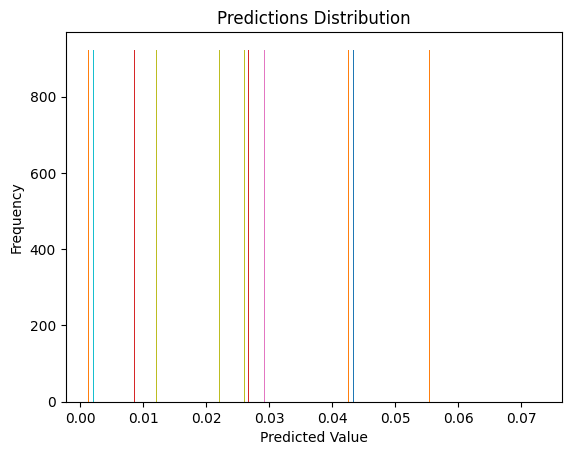

In [ ]:
import matplotlib.pyplot as plt

plt.hist(y_pred_proba, bins=30)
plt.title("Predictions Distribution")
plt.xlabel("Predicted Value")
plt.ylabel("Frequency")
plt.show()

In [ ]:
"""from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Initialize base models
bagging_knn = BaggingClassifier(KNeighborsClassifier(), n_estimators=50, random_state=42)
catboost = CatBoostClassifier(iterations=500,
                           learning_rate=0.1,
                           depth=6,
                           class_weights=[1] * 45,  # Adjust this based on the imbalance
                           random_seed=42)
# Meta-model (Logistic Regression, but you can use any model)
meta_model = LogisticRegression()

# Create a Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=[('bagging_knn', bagging_knn), ('cat',CatBoostClassifier)],
    final_estimator=meta_model
)

# Train the stacking ensemble model
stacking_clf.fit(X_train_prepared, y_train_cleaned)"""


In [ ]:

#c_predictions = stacking_clf.predict(X_test_prepared)

NameError: name 'stacking_clf' is not defined

In [ ]:
"""ensample = stacking_clf.predict_proba(X_train_prepared)
# Calculate Log Loss using sklearn
log_loss_value = log_loss(y_train_cleaned, en_predictions)
print(f"Log Loss: {log_loss_value}")"""

In [ ]:
"""# Import the necessary class
from sklearn.neighbors import KNeighborsClassifier

# Bagging KNN
bagged_knn = BaggingClassifier(
    base_estimator=KNeighborsClassifier(n_neighbors=5),
    n_estimators=10,  # Number of KNN models
    random_state=42
)

# Train bagged KNN
bagged_knn.fit(X_train_prepared, y_train_cleaned)"""

SyntaxError: incomplete input (<ipython-input-24-39de6eac64fe>, line 1)

In [ ]:
"""# Predict probabilities on test data
en_predictions = stacking_clf.predict_proba(X_test_prepared)
"""


**Submission**

In [ ]:
submission = pd.DataFrame({'id': id})
columns = [f'Target_{i}' for i in range(125)]
submission[columns] = 0.00001

# Get predicted probabilities for all classes
y_pred_proba = cat_modle.predict_proba(X_test_prepared) # Assuming X_test is your test data

for i, class_label in enumerate(cat_modle.classes_):
    submission['Target_' + str(class_label)] = y_pred_proba[:, i]

In [ ]:
submission.to_csv('submission.csv', index=False)